<h1>Exploring Roosevelt Natl. Forest Cover Types</h1>
<br>
Here's my exploration of this dataset for predicting leaf cover varieties in the Colorado mountains. If it seems a bit exhaustive, that's just my way of gathering all the information in one place and attempting to consolidate it in a more human-readable fashion. Much of this first section is most likely a reversal of changes previously made to the data set, such as returning dummies to categorical types.
<h2>Project setup</h2>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

pd.set_option('display.max_columns', 100)

In [2]:
# Set up labels 
cover_types = {
    1: "Spruce/Fir",
    2: "Lodgepole Pine",
    3: "Ponderosa Pine",
    4: "Cottonwood/Willow",
    5: "Aspen",
    6: "Douglas-fir",
    7: "Krummholz"}
wild_areas = {
    1: "Rawah Wilderness Area",
    2: "Neota Wilderness Area",
    3: "Comanche Peak Wilderness Area",
    4: "Cache la Poudre Wilderness Area"}
# soil_types = {
#     1: "Cathedral family - Rock outcrop complex, extremely stony.",
#     2: "Vanet - Ratake families complex, very stony.","
#     3 Haploborolis - Rock outcrop complex, rubbly.
#     4 Ratake family - Rock outcrop complex, rubbly.
#     5 Vanet family - Rock outcrop complex complex, rubbly.
#     6 Vanet - Wetmore families - Rock outcrop complex, stony.
#     7 Gothic family.
#     8 Supervisor - Limber families complex.
#     9 Troutville family, very stony.
#     10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
#     11 Bullwark - Catamount families - Rock land complex, rubbly.
#     12 Legault family - Rock land complex, stony.
#     13 Catamount family - Rock land - Bullwark family complex, rubbly.
#     14 Pachic Argiborolis - Aquolis complex.
#     15 unspecified in the USFS Soil and ELU Survey.
#     16 Cryaquolis - Cryoborolis complex.
#     17 Gateview family - Cryaquolis complex.
#     18 Rogert family, very stony.
#     19 Typic Cryaquolis - Borohemists complex.
#     20 Typic Cryaquepts - Typic Cryaquolls complex.
#     21 Typic Cryaquolls - Leighcan family, till substratum complex.
#     22 Leighcan family, till substratum, extremely bouldery.
#     23 Leighcan family, till substratum - Typic Cryaquolls complex.
#     24 Leighcan family, extremely stony.
#     25 Leighcan family, warm, extremely stony.
#     26 Granile - Catamount families complex, very stony.
#     27 Leighcan family, warm - Rock outcrop complex, extremely stony.
#     28 Leighcan family - Rock outcrop complex, extremely stony.
#     29 Como - Legault families complex, extremely stony.
#     30 Como family - Rock land - Legault family complex, extremely stony.
#     31 Leighcan - Catamount families complex, extremely stony.
#     32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
#     33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
#     34 Cryorthents - Rock land complex, extremely stony.
#     35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
#     36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
#     37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
#     38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
#     39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
#     40 Moran family - Cryorthents - Rock land complex, extremely stony."}

<h2>Read input data files into Pandas dataframes</h2>

In [25]:
train_raw = pd.read_csv("../input/train.csv")
test_raw = pd.read_csv("../input/test.csv")
sample_submission = pd.read_csv("../input/sample_submission.csv")

In [26]:
train_raw.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


<h2>Relabel data for interpretation</h2>

In [24]:
train = train_raw.copy()
test = test_raw.copy()

<h3>Relabel cover types with descriptive values</h3>

In [37]:
train['Cover_Type'] = train['Cover_Type'].apply(lambda x: cover_types[x])

<h3>Relabel wilderness areas with true names</h3>

In [38]:
df = train[["Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Wilderness_Area4"]]
df = df.idxmax(axis=1)
train["Wilderness_Area1"] = df.apply(lambda x: wild_areas[int(x.split("Wilderness_Area")[1])])
train = train.rename(columns = {"Wilderness_Area1": "Wilderness_Area"})
train.drop(["Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4"], axis=1, inplace=True)

<h3>Restructure soil types as categorical column</h3>

In [39]:
train['Soil_Type1'] = train[train.columns[12:52]].idxmax(axis=1)
train = train.rename(columns = {"Soil_Type1": "Soil_Type"})
train.drop(train.columns[13:52], inplace=True, axis=1)

In [40]:
train.columns = train.columns.str.replace("_", " ")
train.drop("Id", inplace=True, axis=1)

<h2>Inspect newly labeled and organized data</h2>

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 13 columns):
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal Distance To Hydrology      15120 non-null int64
Vertical Distance To Hydrology        15120 non-null int64
Horizontal Distance To Roadways       15120 non-null int64
Hillshade 9am                         15120 non-null int64
Hillshade Noon                        15120 non-null int64
Hillshade 3pm                         15120 non-null int64
Horizontal Distance To Fire Points    15120 non-null int64
Wilderness Area                       15120 non-null object
Soil Type                             15120 non-null object
Cover Type                            15120 non-null object
dtypes: int64(10), object(3)
memory usage: 1.5+ MB


In [10]:
train.head()

,Elevation,Aspect,Slope,Horizontal Distance To Hydrology,Vertical Distance To Hydrology,Horizontal Distance To Roadways,Hillshade 9am,Hillshade Noon,Hillshade 3pm,Horizontal Distance To Fire Points,Wilderness Area,Soil Type,Cover Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah Wilderness Area,Soil_Type29,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah Wilderness Area,Soil_Type29,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah Wilderness Area,Soil_Type12,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah Wilderness Area,Soil_Type30,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah Wilderness Area,Soil_Type29,Aspen


In [11]:
train.describe()

,Elevation,Aspect,Slope,Horizontal Distance To Hydrology,Vertical Distance To Hydrology,Horizontal Distance To Roadways,Hillshade 9am,Hillshade Noon,Hillshade 3pm,Horizontal Distance To Fire Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


<h2>Data Visualisation</h2>
<br>
Let's look at some plots of the dataset. For some of these we'll have to actually go back to the raw data in order to get the columns in a form that can be graphed properly. 

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

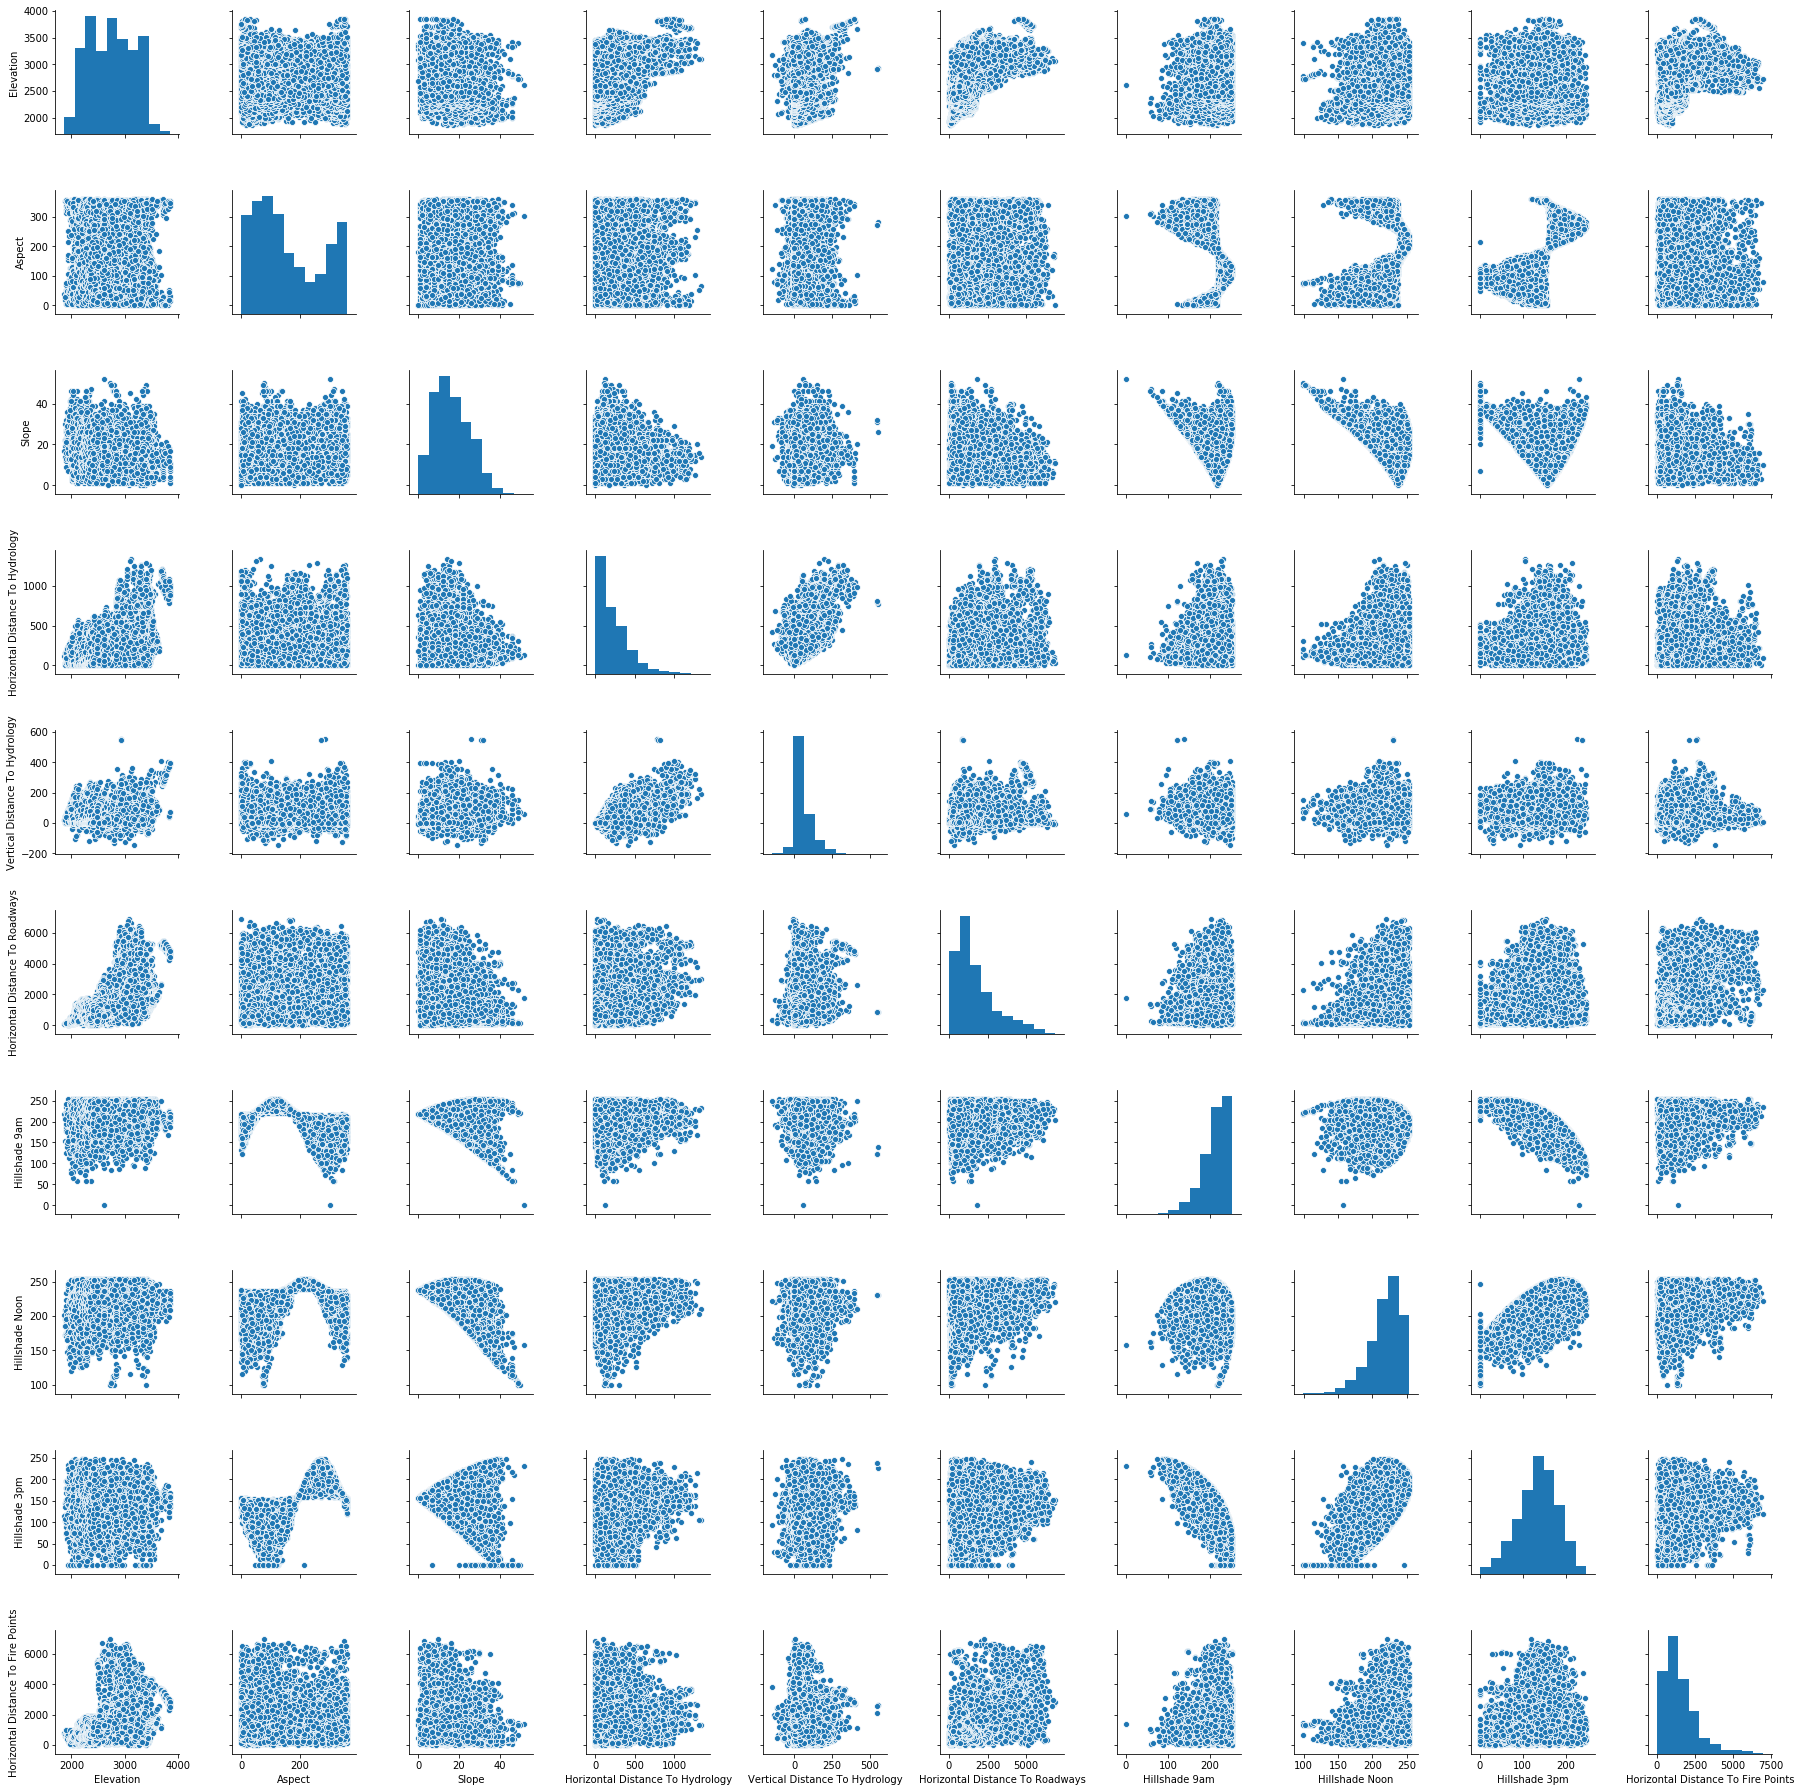

In [13]:
sns.pairplot(data=train)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

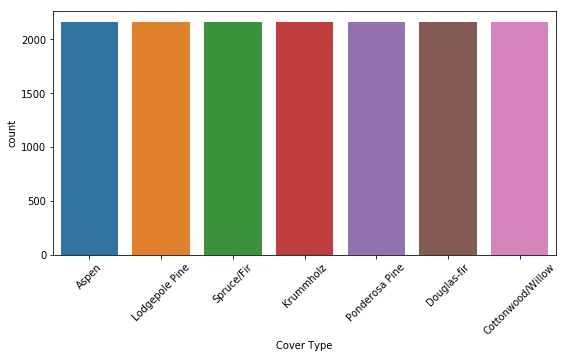

In [41]:
plt.figure(figsize=(9,4.5))
sns.countplot(x="Cover Type", data=train)
plt.xticks(rotation=45)

We can see that each cover type is equally represented in the set. Let's look at how they're distributed relative to some of the other variables.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

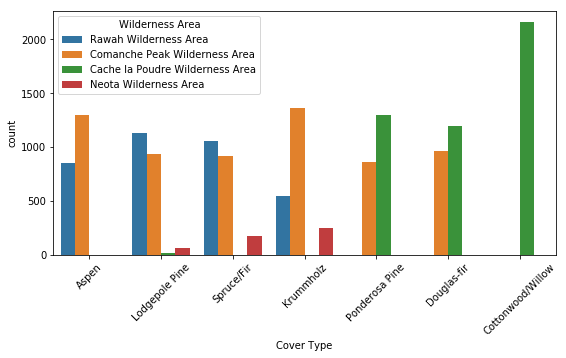

In [113]:
plt.figure(figsize=(9,4.5))
sns.countplot(x='Cover Type', hue='Wilderness Area', data=train)
plt.xticks(rotation=45)

This plot shows us that there seems to be significant correlation between cover type and wilderness area, and that the Neota Area has a much smaller representation than the others. Let's do one more visualization using the soil types.

In [187]:
df = pd.DataFrame(train['Soil Type'].value_counts())   
df.reset_index(inplace=True)
df.columns = ['Soil Type', 'Soil Count']

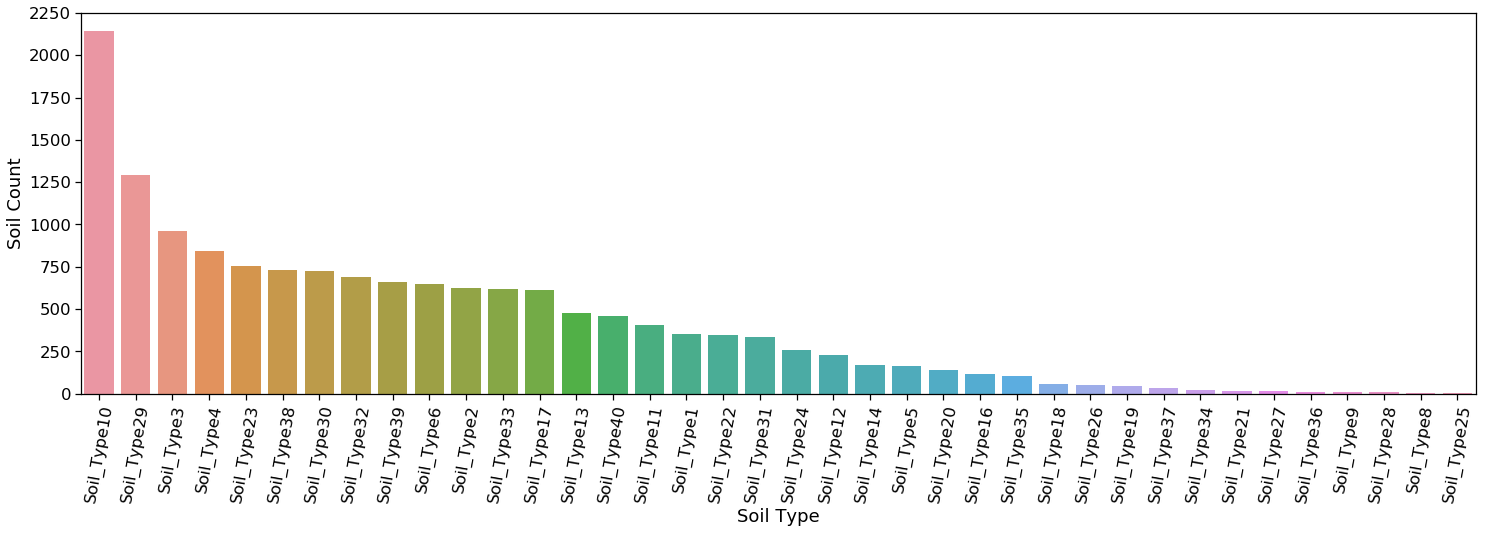

In [204]:
plt.figure(figsize=(25, 7))
sns.barplot(x='Soil Type', y='Soil Count', data=df)
plt.xticks(rotation=80)
sns.set_context("notebook", font_scale=1.5)

Now we can see that the most common soil type by far is Soil_Type10, and the least common types are barely represented, if at all. Let's check on those rarer types to see if they have any entries at all.

In [206]:
df.tail()

,Soil Type,Soil Count
33,Soil_Type36,10
34,Soil_Type9,10
35,Soil_Type28,9
36,Soil_Type8,1
37,Soil_Type25,1


Ok, there's at least one entry for all soil types, but we should be aware that some of them have very low representation.

<h2>Run a prediction model using ?????</h2>

In [17]:
from sklearn.svm import SVC

In [18]:
model = SVC()

In [10]:
X_train = train.drop("Cover_Type", axis=1)
y_train = train['Cover_Type']
X_test = test

In [11]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

* **Make predictions from model**

In [12]:
predictions = model.predict(test)

* **Take a look at results**

In [13]:
df = pd.DataFrame(predictions)

In [14]:
df.head()

,0
0,2
1,2
2,2
3,2
4,2


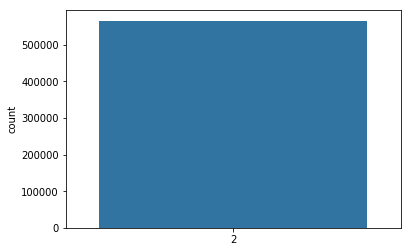

In [23]:
sns.countplot(x=predictions)

<h1>Print submission file</h1>

In [42]:
sub = pd.DataFrame({"Id": test["Id"], "Cover_Type": predictions})
sub.reindex

In [44]:
sub.to_csv("submission.csv", index=False)